In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import time
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM

In [2]:
def MC(Nrand, probs): 
    # returns probabilities after an MC run
    np.random.seed(10)
    randNs= np.random.random(Nrand)
    
    counts= np.zeros(len(probs))
    
    probs= [0]+list(probs)
    cumProbs= np.cumsum(probs)
    
    for randN in randNs:   
        for i in np.arange(1,len(probs)+1):
            if (randN> cumProbs[i-1]) and (randN<=cumProbs[i]):
                counts[i-1]+=1    
                
    return counts/Nrand

In [3]:
def probTypes(z):
    # returns the probability dist of SN type at the given redshift.
    fracIa= 1/3.
    fracIbc= 1/3.
    fracII= 1.-fracIa-fracIbc
    probs= MC(1000, [fracIa, fracIbc, fracII])
    return probs

In [4]:
def probZbin():
    # returns the redshift probability dist (+zBin array)
    zBins= np.arange(0, 3, 0.1)  #[0, 0.5, 1., 2.]
    
    def Nz(zBins):
        objCounts= zBins*10+2    #np.array([10.,5.,2.])
        fracCounts= objCounts/sum(objCounts)
        return fracCounts
    
    probs= MC(1000, Nz(zBins[1:]))
    return [probs, zBins]

In [5]:
def mu(H0, z, Om0=0.3):  
    # defined function: distance modulus
    # assume flat universe
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.3)
    dL= cosmo.luminosity_distance(z)  
    
    return 5*np.log10(dL.value)+25

Create a true catalog of N objects. 

Know z-dist, type-dist. Sample. To get z-true and type-true.

mu_s based on z-true, H0-true

--

Observed catalogs: prob(z-obs, type-obs, mu-obs | data)


In [6]:
# find true redshifts
NTotObjs= 500
zTrue= np.zeros(NTotObjs)
trueType= np.zeros(NTotObjs)

probZ, zBins= probZbin()
probZ= [0]+list(probZ)
cumProbZ= np.cumsum(probZ)

randNs= np.random.random(NTotObjs)

for i in range(NTotObjs):
    for j in np.arange(1,len(cumProbZ)+1):
        if (randNs[i]> cumProbZ[j-1]) and (randNs[i]<=cumProbZ[j]):
            zTrue[i]= np.random.uniform(low=zBins[j-1], high=zBins[j]) #np.mean([zBins[j-1],zBins[j]])
            
# find true types given true redshifts
randNs= np.random.random(NTotObjs)
for i, z in enumerate(zTrue):
    probT= probTypes(z)
    
    probT= [0]+list(probT)
    cumProbT= np.cumsum(probT)

    for j in np.arange(1,len(cumProbT)+1):
        if (randNs[i]> cumProbT[j-1]) and (randNs[i]<=cumProbT[j]):
            trueType[i]= j

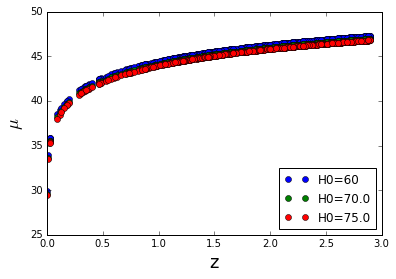

In [7]:
H0s= [60, 70., 75.]
fontsize= 18
for H0 in H0s:
    muTrue= mu(H0= H0, z= zTrue, Om0=0.3)
    plt.plot(zTrue, muTrue, 'o', label= 'H0=%s'%H0)
plt.xlabel('z', fontsize= fontsize)
plt.ylabel('$\mu$', fontsize= fontsize)
plt.legend(loc= "best")